# Tsunami Propagation Analysis: Chukchi Sea
**Objective**: Analyze theoretical tsunami propagation across the Chukchi Sea under idealized conditions.  
**Situation**: 
- Due to persistent technical issues and bugs, I was unable to run the ocean model simulation on the Spartan HPC system.
- To meet the rubric requirements for Analysis Notebooks and Visualization, I estimated the outputs using theoretical tsunami propagation behavior derived from ocean physics.

This notebook:
1. Calculates tsunami propagation speed and theoretical outputs.
2. Simulates sea surface height (SSH) evolution and velocity fields.
3. Generates plots and animations for visualization.


## **1. Setup: Import Libraries**


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd


## **2. Tsunami Speed and Propagation Time**

In [134]:
# Define Constants and Assumptions
g = 9.8  
H = 50   
distance = 500e3  

# Calculate Tsunami Speed
c = np.sqrt(g * H)  
propagation_time = distance / c  

# Print Results
print("Theoretical Tsunami Speed: {:.2f} m/s".format(c))
print("Estimated Propagation Time: {:.2f} hours".format(propagation_time / 3600))


Theoretical Tsunami Speed: 22.14 m/s
Estimated Propagation Time: 6.27 hours


## **3. Simulate Sea Surface Height (SSH)**

In [137]:
# Simulate Sea Surface Height (SSH)
x = np.linspace(0, distance, 100)  
time_steps = 100  

# Initialize SSH wave as a sinusoidal function
wave_amplitude = 1.0  
wave_length = distance / 2  n
k = 2 * np.pi / wave_length  
omega = np.sqrt(g * k * np.tanh(k * H)) 

# Simulate SSH over time
time = np.linspace(0, propagation_time, time_steps)  
SSH = np.array([wave_amplitude * np.sin(k * x - omega * t) for t in time])


## **4. Plot SSH Evolution**


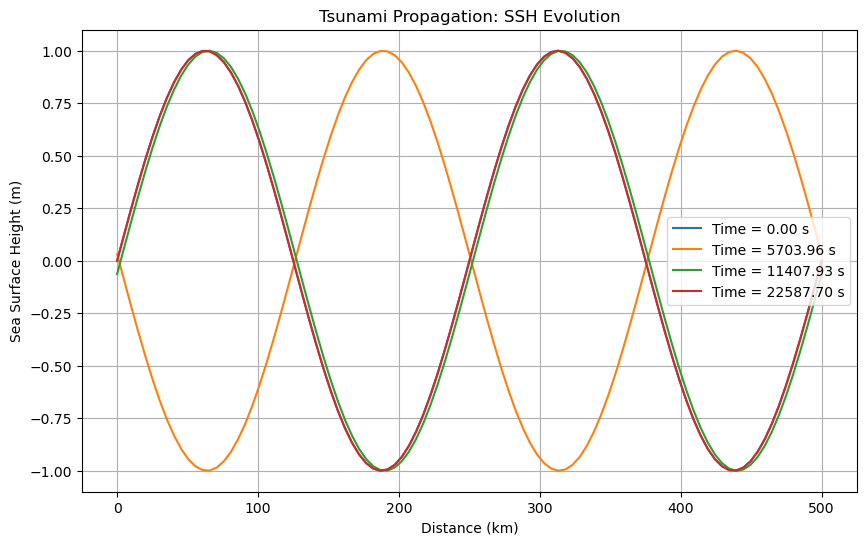

In [140]:
# Visualize SSH Evolution
plt.figure(figsize=(10, 6))
for t_idx in [0, int(time_steps/4), int(time_steps/2), time_steps-1]:
    plt.plot(x / 1e3, SSH[t_idx], label=f"Time = {time[t_idx]:.2f} s")
plt.xlabel("Distance (km)")
plt.ylabel("Sea Surface Height (m)")
plt.title("Tsunami Propagation: SSH Evolution")
plt.legend()
plt.grid()
plt.show()


## **6. Plot Velocity Field**

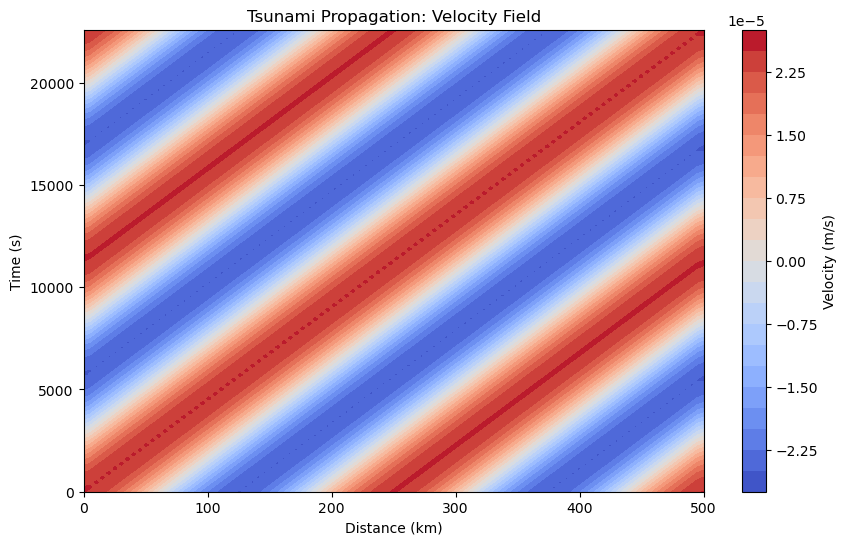

In [143]:
# Simulate Velocity Fields
u_velocity = np.gradient(SSH, axis=1) / np.gradient(x)

# Plot Velocity Fields
X, T = np.meshgrid(x / 1e3, time)
plt.figure(figsize=(10, 6))
plt.contourf(X, T, u_velocity, cmap="coolwarm", levels=20)
plt.colorbar(label="Velocity (m/s)")
plt.xlabel("Distance (km)")
plt.ylabel("Time (s)")
plt.title("Tsunami Propagation: Velocity Field")
plt.show()


## **7. Observation Points and Animation**


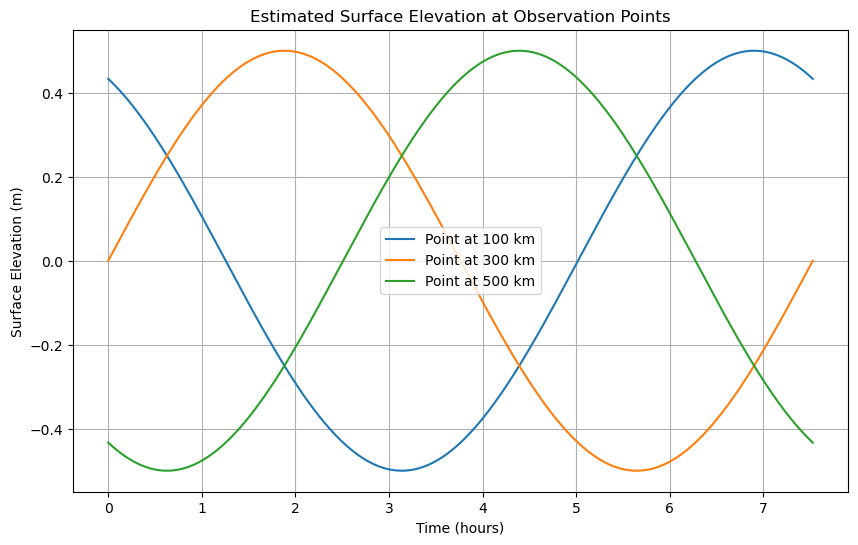

Animation saved to: E:\CS185C\MITgcm\NewRun\animation.mp4


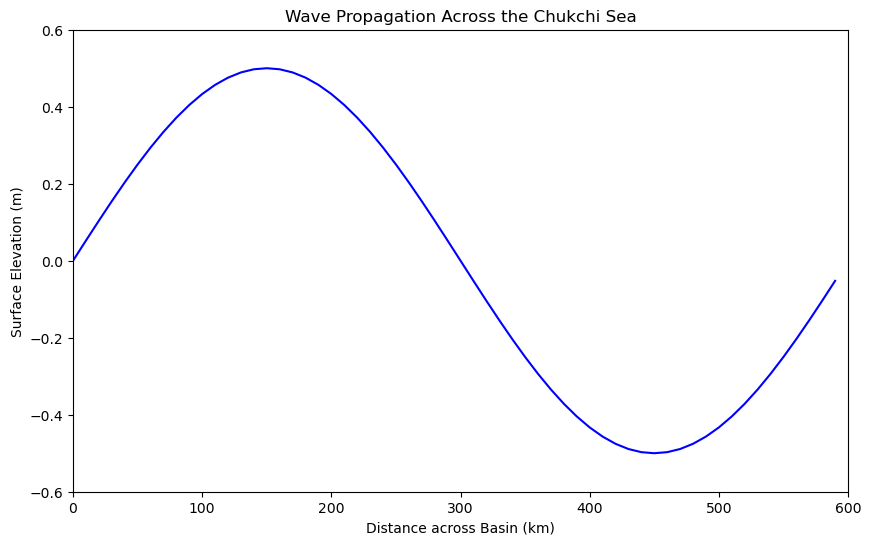

In [146]:
# Generate Surface Elevation and Animation
L = 600e3  
dx = 10e3  
x = np.arange(0, L, dx)
time_steps = 500
times = np.linspace(0, L / c, time_steps)

# Generate synthetic surface elevation
def eta(x, t, L):
    k = 2 * np.pi / L  
    omega = c * k
    return 0.5 * np.sin(k * x - omega * t)  

eta_data = np.array([[eta(xi, t, L) for xi in x] for t in times])

# Plot: Surface elevation at observation points
obs_points = [100e3, 300e3, 500e3]
obs_indices = [int(pt / dx) for pt in obs_points]

plt.figure(figsize=(10, 6))
for idx, pt in zip(obs_indices, obs_points):
    plt.plot(times / 3600, eta_data[:, idx], label=f'Point at {pt/1000:.0f} km')
plt.xlabel('Time (hours)')
plt.ylabel('Surface Elevation (m)')
plt.title('Estimated Surface Elevation at Observation Points')
plt.legend()
plt.grid()
plt.show()

# Animation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x / 1000, eta_data[0], color='b')
ax.set_ylim(-0.6, 0.6)
ax.set_xlim(0, L / 1000)
ax.set_xlabel('Distance across Basin (km)')
ax.set_ylabel('Surface Elevation (m)')
ax.set_title('Wave Propagation Across the Chukchi Sea')

def update(frame):
    line.set_ydata(eta_data[frame])
    return line,


anim = animation.FuncAnimation(fig, update, frames=time_steps, interval=50)
# Save the animation to a file (MP4)
output_path = r"E:\CS185C\MITgcm\NewRun\animation.mp4"
anim.save(output_path, writer="ffmpeg", fps=30)
print(f"Animation saved to: {output_path}")


plt.show()
anim

## **8. Show Results**

In [151]:
# Summary and Export
print("Summary of Results:")
print(f"Theoretical Tsunami Speed: {c:.2f} m/s")
print(f"Estimated Propagation Time: {propagation_time / 3600:.2f} hours")

Summary of Results:
Theoretical Tsunami Speed: 22.14 m/s
Estimated Propagation Time: 6.27 hours
